In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


# CREDIT SCORING
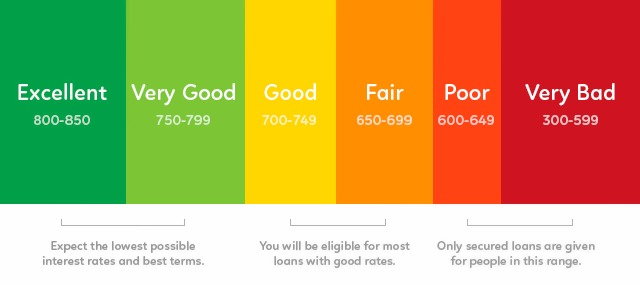

## Variables

**Usia** : 21 s/d 100
 - 1 : >64
 - 2 : 21 - 64

**Jumlah Pinjaman** : 500000 s/d 3000000
 
**Tenor (minggu)** = 2 s/d 20 minggu
 
**Pemasukan** = no range
 
**Tanggungan** = 0 s/d inf
 
**Pekerjaan** 
 - 1 : Wirausaha/ Pedagang/ Pekerja Lepas
 - 2 : Buruh/Guru/Dosen

**Peminjaman ke-** 
 - 1 : 1 
 - 2 : 2- 3 
 - 3 : > 3
 
**Hari telat bayar** 
 - 0 : tidak pernah 
 - 1 : < 1 minggu 
 - 2 : 2 - 4 minggu 
 - 3 : > 4 minggu
 
**Pernah Donasi** 
 - 0 : tidak pernah 
 - 1 : 1k-50k 
 - 2 : 51k – 100k
 - 3 : > 100k

## Open Datasets with Pandas 

In [124]:
with open("./Datasets_Dummy_FicoScore-2.csv", 'r') as csvfile:
    print(f"First line (header) looks like this:\n\n{csvfile.readline()}")
    print(f"Each data point looks like this:\n\n{csvfile.readline()}")

First line (header) looks like this:

usia,pinjaman,tenor,pemasukan,tanggungan,pekerjaan,pinjaman ke,telat bayar,donasi,score

Each data point looks like this:

2,700000,8,4500000,5,1,2,3,3,640.38



In [125]:
data  = pd.read_csv(r'./Datasets_Dummy_FicoScore-2.csv', delimiter=',')
data.head()

,usia,pinjaman,tenor,pemasukan,tanggungan,pekerjaan,pinjaman ke,telat bayar,donasi,score
0,2,700000,8,4500000,5,1,2,3,3,640.38
1,2,1200000,6,3000000,3,1,3,1,2,596.87
2,2,1200000,10,1200000,2,1,3,0,3,514.20
3,2,500000,4,4500000,1,1,3,2,1,679.54
4,2,1200000,10,1500000,5,1,3,2,3,396.20


## Exploratory Data Analyis (EDA)

In [126]:
# column list
data.columns

Index(['usia', 'pinjaman', 'tenor', 'pemasukan', 'tanggungan', 'pekerjaan',
       'pinjaman ke', 'telat bayar', 'donasi', 'score'],
      dtype='object')

In [127]:
# statistical description of the data
data.describe()

,usia,pinjaman,tenor,pemasukan,tanggungan,pekerjaan,pinjaman ke,telat bayar,donasi,score
count,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.886500,1.469900e+06,8.883700,3.220850e+06,2.494000,1.334300,2.187700,1.873200,1.508400,532.075761
std,0.317219,6.761107e+05,5.127007,1.285949e+06,1.706416,0.471769,0.753343,1.002408,1.116895,150.043352
min,1.000000,5.000000e+05,3.000000,1.200000e+06,0.000000,1.000000,1.000000,0.000000,0.000000,102.070000
25%,2.000000,1.000000e+06,4.000000,2.000000e+06,1.000000,1.000000,2.000000,1.000000,1.000000,412.230000
50%,2.000000,1.400000e+06,8.000000,3.000000e+06,2.500000,1.000000,2.000000,2.000000,2.000000,555.390000
75%,2.000000,1.900000e+06,12.000000,4.500000e+06,4.000000,2.000000,3.000000,3.000000,3.000000,651.210000
max,2.000000,3.000000e+06,20.000000,5.000000e+06,5.000000,2.000000,3.000000,3.000000,3.000000,849.950000


In [128]:
# additional info about data: type, number of nulls, number of rows and others
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   usia         10000 non-null  int64  
 1   pinjaman     10000 non-null  int64  
 2   tenor        10000 non-null  int64  
 3   pemasukan    10000 non-null  int64  
 4   tanggungan   10000 non-null  int64  
 5   pekerjaan    10000 non-null  int64  
 6   pinjaman ke  10000 non-null  int64  
 7   telat bayar  10000 non-null  int64  
 8   donasi       10000 non-null  int64  
 9   score        10000 non-null  float64
dtypes: float64(1), int64(9)
memory usage: 781.4 KB


In [129]:
# the number of rows and columns in the data
print('Total Row:', data.shape[0])
print('Total Columns:', data.shape[1])
data.shape

Total Row: 10000
Total Columns: 10


(10000, 10)

## Data Cleaning

### -- *Check Missing Value*

In [130]:
# Check missing value
data.isnull().sum()

usia           0
pinjaman       0
tenor          0
pemasukan      0
tanggungan     0
pekerjaan      0
pinjaman ke    0
telat bayar    0
donasi         0
score          0
dtype: int64

In [131]:
print("Null values : ", data.isnull().sum().sum())
print("Shape of data: ", data.shape)

Null values :  0
Shape of data:  (10000, 10)


### -- *Check Duplicate*

In [132]:
#Check duplicate data
print("Data duplicated: ", data.duplicated().sum())

Data duplicated:  97


## Data Preprocessing

### -- *Spitting features and label*

In [133]:
features = data.drop(columns=['score'])
label = data[['score']]

print(features.shape)
print(label.shape)

features.columns, label.columns

(10000, 9)
(10000, 1)


(Index(['usia', 'pinjaman', 'tenor', 'pemasukan', 'tanggungan', 'pekerjaan',
        'pinjaman ke', 'telat bayar', 'donasi'],
       dtype='object'),
 Index(['score'], dtype='object'))

### -- *Check Data Type*

Menyesuaikan tipe data sesuai dengan metadata yang diberikan

- **Categorical** (usia, pekerjaan, pinjaman ke, telat bayar, donasi )
- **Numeric** (jumlah pinjaman, tenor, pemasukan, tanggungan)

In [134]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


In [136]:
col_cat_label = ['score']
label[col_cat_label] = label[col_cat_label].astype('int64')
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   score   10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


In [137]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   usia         10000 non-null  int64
 1   pinjaman     10000 non-null  int64
 2   tenor        10000 non-null  int64
 3   pemasukan    10000 non-null  int64
 4   tanggungan   10000 non-null  int64
 5   pekerjaan    10000 non-null  int64
 6   pinjaman ke  10000 non-null  int64
 7   telat bayar  10000 non-null  int64
 8   donasi       10000 non-null  int64
dtypes: int64(9)
memory usage: 703.2 KB


In [138]:
col_cat_features = ['usia' , 'pekerjaan' , 'pinjaman ke' , 'telat bayar' , 'donasi' ]

features[col_cat_features] = features[col_cat_features].astype('category')

In [139]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   usia         10000 non-null  category
 1   pinjaman     10000 non-null  int64   
 2   tenor        10000 non-null  int64   
 3   pemasukan    10000 non-null  int64   
 4   tanggungan   10000 non-null  int64   
 5   pekerjaan    10000 non-null  category
 6   pinjaman ke  10000 non-null  category
 7   telat bayar  10000 non-null  category
 8   donasi       10000 non-null  category
dtypes: category(5), int64(4)
memory usage: 362.2 KB


## Normalize Data

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

## Split Into Train and Test

In [141]:
X_train, X_validate, y_train, y_validate = train_test_split(
    features, label, test_size=0.3, shuffle=True)

In [142]:
print(X_train.shape)
print(y_train.shape)

(7000, 9)
(7000, 1)


In [143]:
print(X_validate.shape)
print(y_validate.shape)

(3000, 9)
(3000, 1)


In [144]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(units=1, input_shape=[6], activation='linear'),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(units=1),
    ])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 1e-1),
            # loss='mean_squared_error',
            loss = tf.keras.losses.Huber(),
            metrics=['mae'])

In [145]:
mc = ModelCheckpoint('creditscoreold_model.h5', monitor='val_mae', mode='min', verbose=1, save_best_only=True)

In [146]:
# Train the model
# mc = ModelCheckpoint('ficoscore_model_05.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model.fit(X_train, 
                y_train, 
                epochs=100,
                callbacks = [mc],
                validation_data=(X_validate, y_validate))

Epoch 1/100
200/219 [==========================>...] - ETA: 0s - loss: 140.4958 - mae: 140.9938
Epoch 1: val_mae improved from inf to 45.01096, saving model to creditscoreold_model.h5
219/219 [==============================] - 2s 4ms/step - loss: 132.5983 - mae: 133.0963 - val_loss: 44.5134 - val_mae: 45.0110
Epoch 2/100
202/219 [==========================>...] - ETA: 0s - loss: 46.2679 - mae: 46.7658
Epoch 2: val_mae did not improve from 45.01096
219/219 [==============================] - 1s 4ms/step - loss: 46.1443 - mae: 46.6422 - val_loss: 59.1168 - val_mae: 59.6151
Epoch 3/100
211/219 [===========================>..] - ETA: 0s - loss: 46.1138 - mae: 46.6118
Epoch 3: val_mae improved from 45.01096 to 39.54626, saving model to creditscoreold_model.h5
219/219 [==============================] - 1s 4ms/step - loss: 46.0544 - mae: 46.5524 - val_loss: 39.0485 - val_mae: 39.5463
Epoch 4/100
209/219 [===========================>..] - ETA: 0s - loss: 49.6047 - mae: 50.1022
Epoch 4: val_mae 

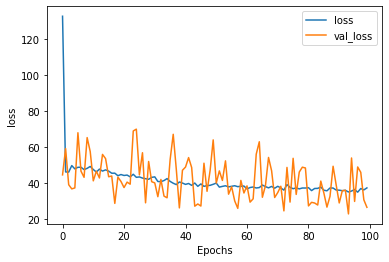

In [147]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
# plot_graphs(history, "metrics")
plot_graphs(history, "loss")

In [148]:
print(type(y_validate))
y_pred = pd.DataFrame(model.predict(X_validate), columns = ['y_pred'])
print(type(y_pred))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [149]:
print(y_validate)
print(y_pred)

      score
5810    318
5442    314
4621    718
170     608
6037    771
...     ...
6637    243
8888    289
7049    687
6169    711
4214    611

[3000 rows x 1 columns]
          y_pred
0     303.815369
1     307.783142
2     632.179138
3     566.347595
4     738.024902
...          ...
2995  245.247177
2996  335.658447
2997  634.046021
2998  684.646667
2999  601.389343

[3000 rows x 1 columns]


In [151]:
y_validate = y_validate.reset_index()
y_pred = y_pred.reset_index()
print(y_validate)
print(y_pred)

      level_0  index  score
0           0   5810    318
1           1   5442    314
2           2   4621    718
3           3    170    608
4           4   6037    771
...       ...    ...    ...
2995     2995   6637    243
2996     2996   8888    289
2997     2997   7049    687
2998     2998   6169    711
2999     2999   4214    611

[3000 rows x 3 columns]
      level_0  index      y_pred
0           0      0  303.815369
1           1      1  307.783142
2           2      2  632.179138
3           3      3  566.347595
4           4      4  738.024902
...       ...    ...         ...
2995     2995   2995  245.247177
2996     2996   2996  335.658447
2997     2997   2997  634.046021
2998     2998   2998  684.646667
2999     2999   2999  601.389343

[3000 rows x 3 columns]


<AxesSubplot:xlabel='index', ylabel='y_pred'>

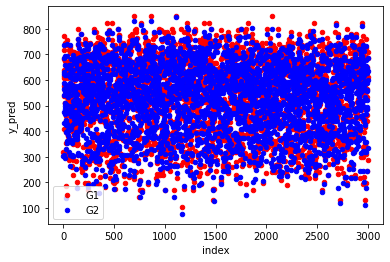

In [152]:
ax = y_validate.plot(kind='scatter', x='level_0', y='score',
                                           color='Red', label='G1')
y_pred.plot(kind='scatter', x='index', y='y_pred',
                                          color='Blue', label='G2', ax=ax)

In [153]:
y_val = y_validate['score'].to_list()
y_pred = y_pred['y_pred'].to_list()

In [154]:
list_y = pd.DataFrame(np.column_stack([y_val, y_pred]), 
                               columns=['y_val', 'y_pred'])

<AxesSubplot:>

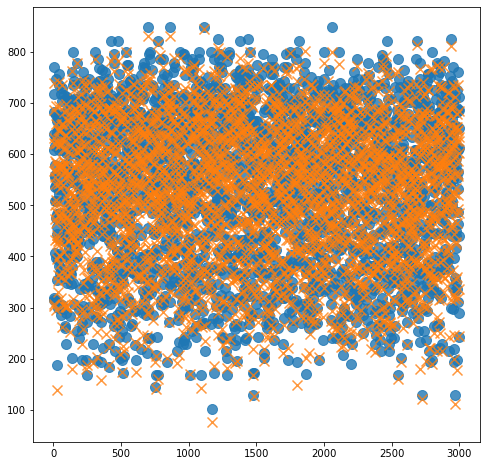

In [155]:
df1 = [2.5, 2.5, 2, 3, 4, 3.5]
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(ax=ax, x=df1)

index = list(range(1,3001))

# sns scatter, with regression fit turned off
sns.regplot(x=np.array(index), y=np.array(list_y['y_val']), scatter=True, fit_reg=False, marker='o',
            scatter_kws={"s": 100})  # the "s" key in `scatter_kws` modifies the size of the marker
# sns scatter, with regression fit turned off
sns.regplot(x=np.array(index), y=np.array(list_y['y_pred']), scatter=True, fit_reg=False, marker='x',
            scatter_kws={"s": 100})  # the "s" key in `scatter_kws` modifies the size of the marker

# Convert Model to TFLite

In [157]:
new_model = tf.keras.models.load_model('./creditscoreold_model.h5')

# Check its architecture
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 9)                 0         
                                                                 
 dense_10 (Dense)            (None, 10)                100       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [158]:
CREDIT_SCORE_SAVED_MODEL = "exp_credit_score_saved_model-05"

In [159]:
tf.saved_model.save(new_model, CREDIT_SCORE_SAVED_MODEL)

INFO:tensorflow:Assets written to: exp_credit_score_saved_model-05\assets


INFO:tensorflow:Assets written to: exp_credit_score_saved_model-05\assets


In [160]:
loaded = tf.saved_model.load(CREDIT_SCORE_SAVED_MODEL)

In [161]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'flatten_5_input': TensorSpec(shape=(None, 9), dtype=tf.float32, name='flatten_5_input')})
{'dense_11': TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_11')}


In [162]:
converter = tf.lite.TFLiteConverter.from_saved_model(CREDIT_SCORE_SAVED_MODEL)

converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [163]:
tflite_model = converter.convert()
tflite_model_file = 'credit_score_model_old.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [165]:
try:
    files.download('credit_score_model_old.tflite')
except:
    pass